In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [2]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [3]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [4]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [5]:
def cross_validation(x_train, y_train, k=5):
    kfold_data = []
    
    # deal with number of data cannot be divided by k
    mod = x_train.shape[0] % k
    fold_len = np.empty(shape=k, dtype=int)
    fold_len.fill(int(x_train.shape[0]/k))

    for m in range(mod):
        fold_len[m] += 1
    
    # shuffle index
    indices = np.arange(x_train.shape[0], dtype=int)
    np.random.shuffle(indices)

    # arrange indices of each fold
    for i in range(k):
        train_indices = np.empty(shape=x_train.shape[0]-fold_len[i], dtype=int)
        val_indices = np.empty(shape=fold_len[i], dtype=int)

        idx, train_idx = 0, 0

        for j in range(k):
            if i == j:
                val_indices = indices[idx: idx+fold_len[j]]
            else:
                train_indices[train_idx: train_idx+fold_len[j]] = indices[idx: idx+fold_len[j]]
                train_idx += fold_len[j]
            
            idx += fold_len[j]

        kfold_data.append([train_indices, val_indices])

    return kfold_data

In [50]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [7]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  4  5  7  8  9 10 11 13 14 15 16 18 19], Validation index: [ 3  6 12 17]
Split: 2, Training index: [ 2  3  4  5  6  9 10 11 12 13 14 15 16 17 18 19], Validation index: [0 1 7 8]
Split: 3, Training index: [ 0  1  3  5  6  7  8  9 10 11 12 13 16 17 18 19], Validation index: [ 2  4 14 15]
Split: 4, Training index: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 17], Validation index: [ 5 16 18 19]
Split: 5, Training index: [ 0  1  2  3  4  5  6  7  8 12 14 15 16 17 18 19], Validation index: [ 9 10 11 13]


In [7]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [33]:
#clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [53]:
## your code
k = 5
kfold_data = cross_validation(x_train, y_train, k=k)
acc_table = []

c_range = np.logspace(-1, 6, 8)
gamma_range = np.logspace(-7, -3, 5)

i = 0
while i < len(c_range):
    acc_row = []
    j = 0
    while j < len(gamma_range):
        c, gamma = c_range[i], gamma_range[j]

        clf = SVC(C=c, kernel='rbf', gamma=gamma)
        acc, d = 0.0, 0

        while d < k:
            # assign training dataset and valid dataset
            train_data, train_y, val_data, val_y = x_train[kfold_data[d][0]], y_train[kfold_data[d][0]], x_train[kfold_data[d][1]], y_train[kfold_data[d][1]]
            
            clf.fit(train_data, train_y)
            y_pred = clf.predict(val_data)
            acc += accuracy_score(y_pred, val_y)
            d += 1
        
        acc /= k
        acc_row.append(acc)

        j += 1

    acc_table.append(acc_row)
    i += 1


(0.1, 1e-07): 0.5650000000000001
(0.1, 1e-06): 0.565857142857143
(0.1, 1e-05): 0.9147142857142857
(0.1, 0.0001): 0.9737142857142856
(0.1, 0.001): 0.5174285714285715
(1.0, 1e-07): 0.5650000000000001
(1.0, 1e-06): 0.909142857142857
(1.0, 1e-05): 0.954
(1.0, 0.0001): 0.9932857142857143
(1.0, 0.001): 0.566857142857143
(10.0, 1e-07): 0.9084285714285715
(10.0, 1e-06): 0.9384285714285714
(10.0, 1e-05): 0.9838571428571429
(10.0, 0.0001): 0.9932857142857143
(10.0, 0.001): 0.5662857142857143
(100.0, 1e-07): 0.9358571428571428
(100.0, 1e-06): 0.9481428571428572
(100.0, 1e-05): 0.99
(100.0, 0.0001): 0.9932857142857143
(100.0, 0.001): 0.5662857142857143
(1000.0, 1e-07): 0.9398571428571427
(1000.0, 1e-06): 0.9748571428571429
(1000.0, 1e-05): 0.9898571428571428
(1000.0, 0.0001): 0.9932857142857143
(1000.0, 0.001): 0.5662857142857143
(10000.0, 1e-07): 0.9368571428571428
(10000.0, 1e-06): 0.987142857142857
(10000.0, 1e-05): 0.9898571428571428
(10000.0, 0.0001): 0.9932857142857143
(10000.0, 0.001): 0.56

In [54]:

acc_table = np.array(acc_table)
idx = np.argmax(acc_table)
c_idx = idx // 5 + 1
gamma_idx = idx % 5

# (gamma, c)
best_parameters = (c_range[c_idx], gamma_range[gamma_idx])
print("(c, gamma) = ", best_parameters)

(c, gamma) =  (10.0, 0.0001)


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

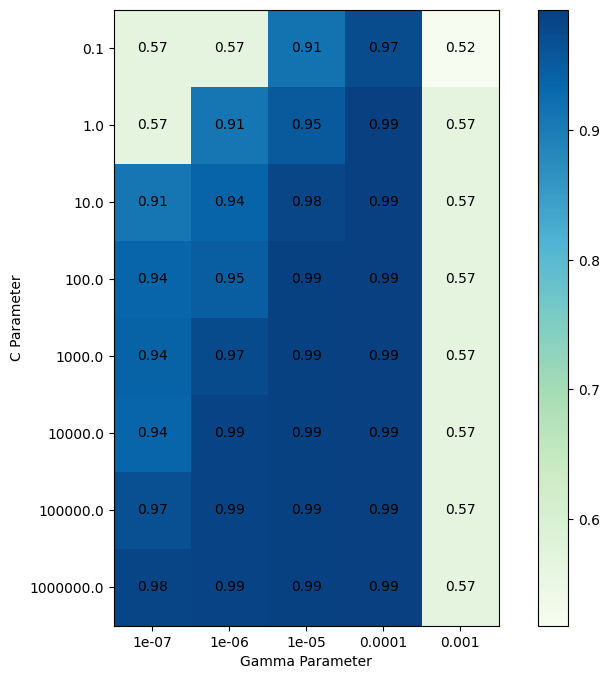

In [55]:
import matplotlib.pyplot as plt

# plot grid search with dataframe
df = pd.DataFrame(data=acc_table, index=c_range, columns=gamma_range)
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(df, cmap='GnBu')
fig.colorbar(img, orientation='vertical', fraction=0.05)

ax.set_xticks(np.arange(len(gamma_range)), labels=gamma_range)
ax.set_yticks(np.arange(len(c_range)), labels=c_range)
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")

for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, str(round(acc_table[i, j], 2)), fontsize=10, ha="center", va="center", color="black")

plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [57]:
best_c, best_gamma = best_parameters
best_model = SVC(C=best_c, kernel='rbf', gamma=best_gamma)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

NameError: name 'y_test' is not defined